# End to End Time Series forecasting using ARIMA
#### This stock price prediction is completely based on Youtube channel UnfoldDataScience (https://www.youtube.com/c/UnfoldDataScience). This was a part of time series analysis

In [1]:
#Changing working directory
import os
print(os.getcwd())
import warnings
warnings.filterwarnings('ignore')

W:\FOCUS\Github\DataScience_PRIVATE\AmanYoutubeTutorials\Time Series Analysis


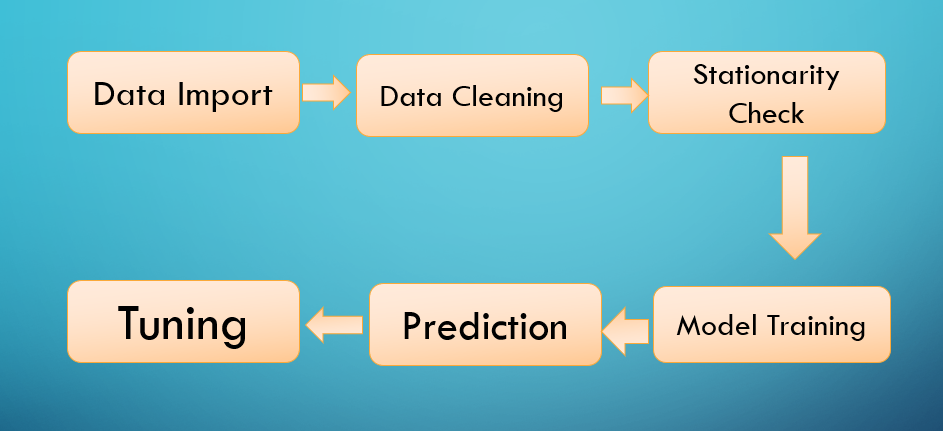

In [2]:
from IPython.display import Image
Image(filename='Capture.png') 

In [3]:
#Data Import and cleaning

In [2]:
# Data and package Import
#Data Source - Kaggle - https://www.kaggle.com/rohanrao/nifty50-stock-market-data
# data  for a 50+ companies are given, here we are considering the data for HCLTech
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARMA
TempData = pd.read_csv('HCLTECH.csv') 
TempData.head(30)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-11,HCLTECH,EQ,580.00,1550.00,1725.00,1492.00,1560.00,1554.45,1582.72,1192200,1.886915e+14,NaN,NaN,NaN
1,2000-01-12,HCLTECH,EQ,1554.45,1560.00,1678.85,1560.00,1678.85,1678.85,1657.05,344850,5.714349e+13,NaN,NaN,NaN
2,2000-01-13,HCLTECH,EQ,1678.85,1790.00,1813.20,1781.00,1813.20,1813.20,1804.69,53000,9.564880e+12,NaN,NaN,NaN
3,2000-01-14,HCLTECH,EQ,1813.20,1958.30,1958.30,1835.00,1958.30,1958.30,1939.90,270950,5.256169e+13,NaN,NaN,NaN
4,2000-01-17,HCLTECH,EQ,1958.30,2115.00,2115.00,1801.65,1801.65,1801.65,1990.55,428800,8.535473e+13,NaN,NaN,NaN
5,2000-01-18,HCLTECH,EQ,1801.65,1730.55,1815.00,1657.55,1775.00,1774.50,1716.39,359900,6.177280e+13,NaN,NaN,NaN
6,2000-01-19,HCLTECH,EQ,1774.50,1815.00,1889.00,1760.00,1842.80,1851.15,1842.81,316050,5.824204e+13,NaN,NaN,NaN
7,2000-01-20,HCLTECH,EQ,1851.15,1865.00,1865.00,1750.00,1753.50,1757.85,1801.37,204700,3.687409e+13,NaN,NaN,NaN
8,2000-01-21,HCLTECH,EQ,1757.85,1761.00,1815.00,1705.00,1786.00,1781.35,1774.01,282150,5.005360e+13,NaN,NaN,NaN
9,2000-01-24,HCLTECH,EQ,1781.35,1834.90,1923.90,1795.00,1923.90,1923.90,1875.34,328650,6.163317e+13,NaN,NaN,NaN


In [3]:
#Data Cleaning
HCLTechStockData = TempData.dropna() #dropping data with NA data


HCLTechStockData.index = pd.to_datetime(HCLTechStockData.Date) # making the date column the index column, 
# This is because the index column should be always a date column in time-series analysis

# considering data from 1st Jan, 2013 till 2nd Dec, 2013
HCLTechStockData = HCLTechStockData["Prev Close"]['2013-01-01':'2013-12-2'] 
HCLTechStockData.describe()

count     230.000000
mean      852.953478
std       156.484472
min       618.700000
25%       736.350000
50%       777.450000
75%      1023.962500
max      1161.150000
Name: Prev Close, dtype: float64

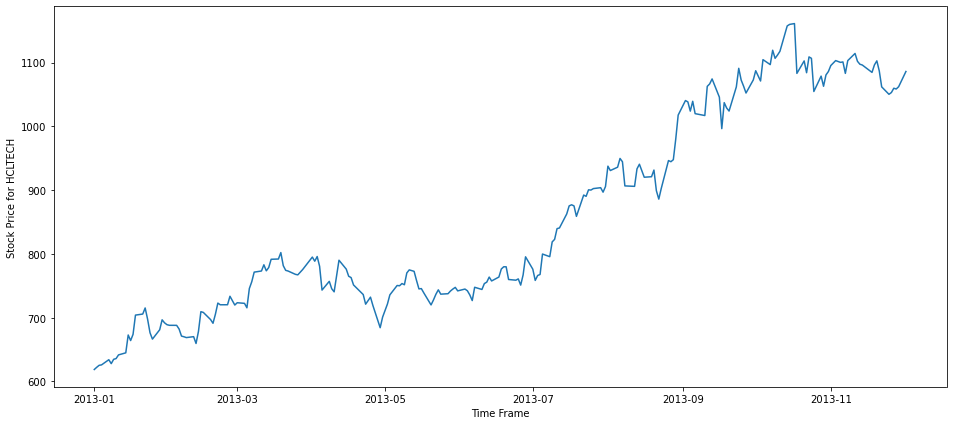

In [4]:
#Data Exploration
plt.figure(figsize=(16,7))
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Time Frame')
ax1.set_ylabel('Stock Price for HCLTECH')
ax1.plot(HCLTechStockData)

In [5]:
# Checking stationarity
HCLTechStockData.info() # this has turned into a series

AttributeError: 'Series' object has no attribute 'info'

In [6]:
# To perform stationarity check
# Method 1 -  Rolling Statistics
# Method 2 -  Adfuller (which is based upon null hypothesis rejection using p-value)

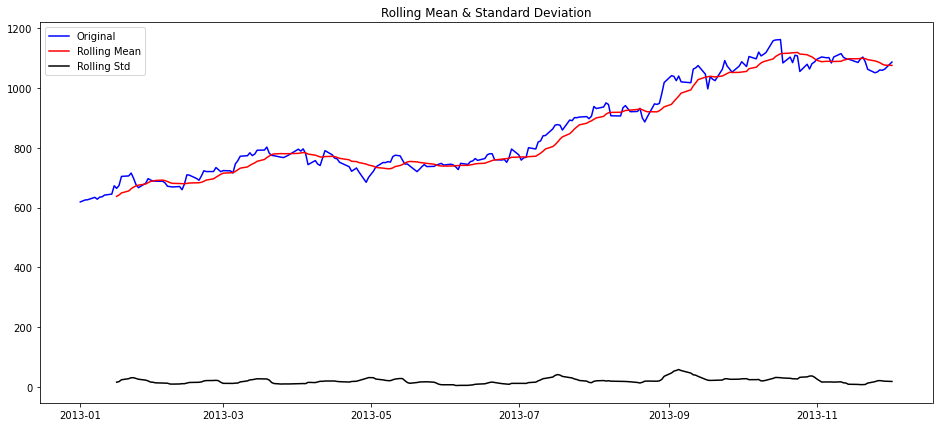

In [7]:
#Determing rolling statistics
rolLmean = HCLTechStockData.rolling(12).mean() #skipping first 11 values for calculating mean, then using last 12 values for mean calculation
rolLstd = HCLTechStockData.rolling(12).std()

plt.figure(figsize=(16,7))
fig = plt.figure(1)

#Plot rolling statistics:
orig = plt.plot(HCLTechStockData, color='blue',label='Original')
mean = plt.plot(rolLmean, color='red', label='Rolling Mean')
std = plt.plot(rolLstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

#### Observation: 
##### As rolling std is almost constant over the time period of 1 year; but mean is not at all constant over time. So the selected data is non-stationary.

# making Series Stationary

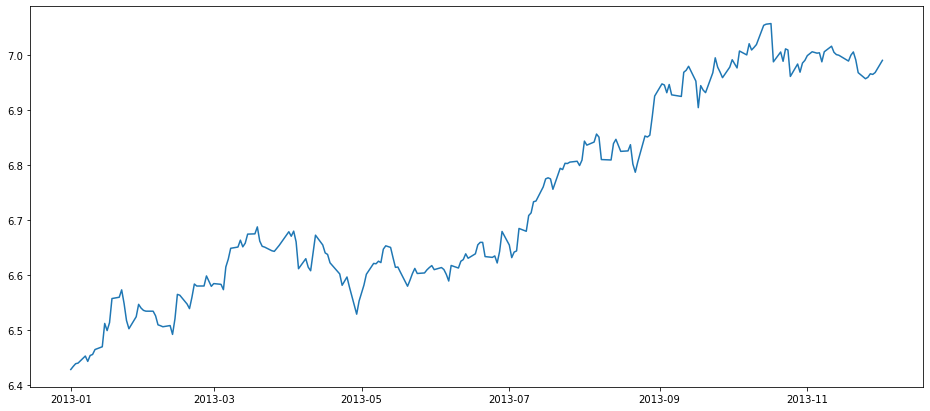

In [9]:
#Lets try transformation
plt.figure(figsize=(16,7))
fig = plt.figure(1)

import numpy as np
ts_log = np.log(HCLTechStockData)
plt.plot(ts_log)

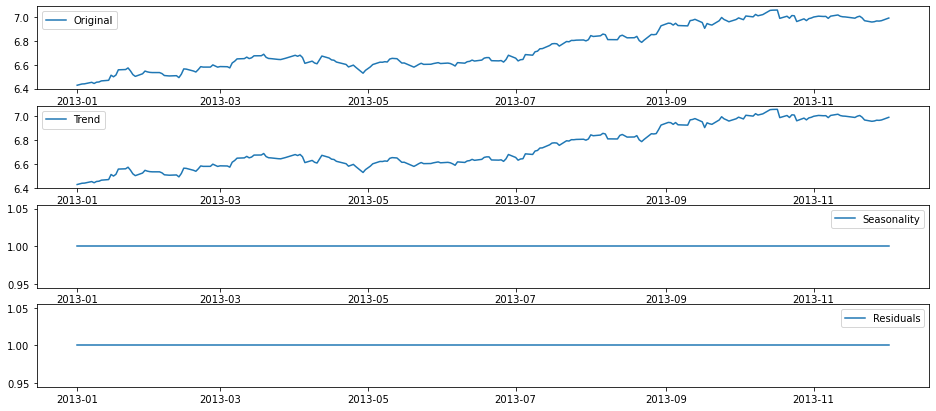

In [10]:
#Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log,freq=1,model = 'multiplicative')

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(16,7))
fig = plt.figure(1)

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

#### Observation:
##### Even after taking log, the series still holds the 'trend' component

In [13]:
ts_log_decomposition = pd.concat([ts_log, trend, seasonal, residual], axis=1)
ts_log_decomposition.columns = ['original', 'trend', 'seasonal', 'residual']
ts_log_decomposition.head(10)

,original,trend,seasonal,residual
Date,,,,
2013-01-01,6.427621,6.427621,1.0,1.0
2013-01-02,6.433181,6.433181,1.0,1.0
2013-01-03,6.438152,6.438152,1.0,1.0
2013-01-04,6.439270,6.439270,1.0,1.0
2013-01-07,6.452128,6.452128,1.0,1.0
2013-01-08,6.442381,6.442381,1.0,1.0
2013-01-09,6.453152,6.453152,1.0,1.0
2013-01-10,6.454963,6.454963,1.0,1.0
2013-01-11,6.463965,6.463965,1.0,1.0


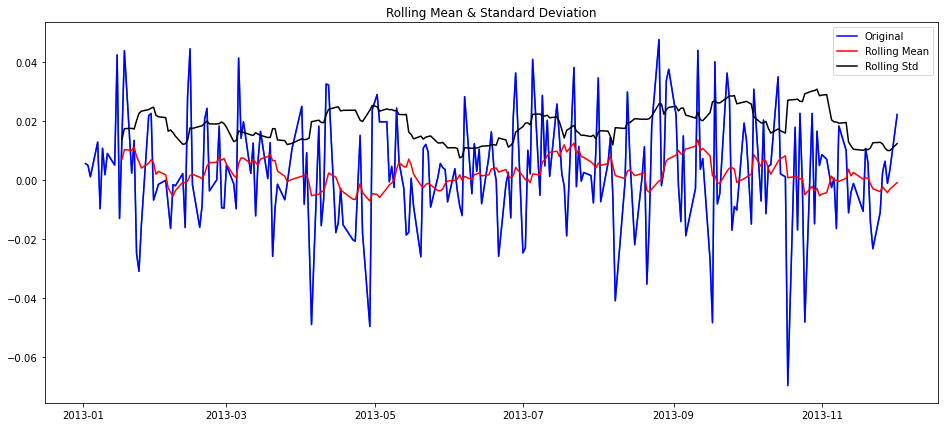

In [14]:
#Lets try differencing
# for making the time - series stationary.

plt.figure(figsize=(16,7))
fig = plt.figure(1)
ts_log_diff = ts_log - ts_log.shift() # shift by 1 value down; first value would be NaN
plt.plot(ts_log_diff)

#Determing rolling statistics
rolLmean = ts_log_diff.rolling(12).mean()
rolLstd = ts_log_diff.rolling(12).std()




#Plot rolling statistics:
orig = plt.plot(ts_log_diff, color='blue',label='Original')
mean = plt.plot(rolLmean, color='red', label='Rolling Mean')
std = plt.plot(rolLstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [15]:
ts_log_diff.head(10)

Date
2013-01-01         NaN
2013-01-02    0.005561
2013-01-03    0.004970
2013-01-04    0.001119
2013-01-07    0.012857
2013-01-08   -0.009747
2013-01-09    0.010772
2013-01-10    0.001810
2013-01-11    0.009002
2013-01-14    0.005053
Name: Prev Close, dtype: float64

In [18]:
# let us try a adfuller test to verify that the time series is now stationary
# Adfuller test
from statsmodels.tsa.stattools import adfuller
# ADF test - null hypothesis : the time series is non-stationary; if p-val < 0.05 we can reject null hypothesis
## we need to avoid the missing values
adfuller_test = adfuller(ts_log_diff.dropna(), autolag='AIC') 
print(f'p-val:{adfuller_test[1]}')

## Observation: p-value is less than 0.05 thus proving that we can reject the null hypothesis, thus the time series is now stationary

p-val:8.709941370942333e-22


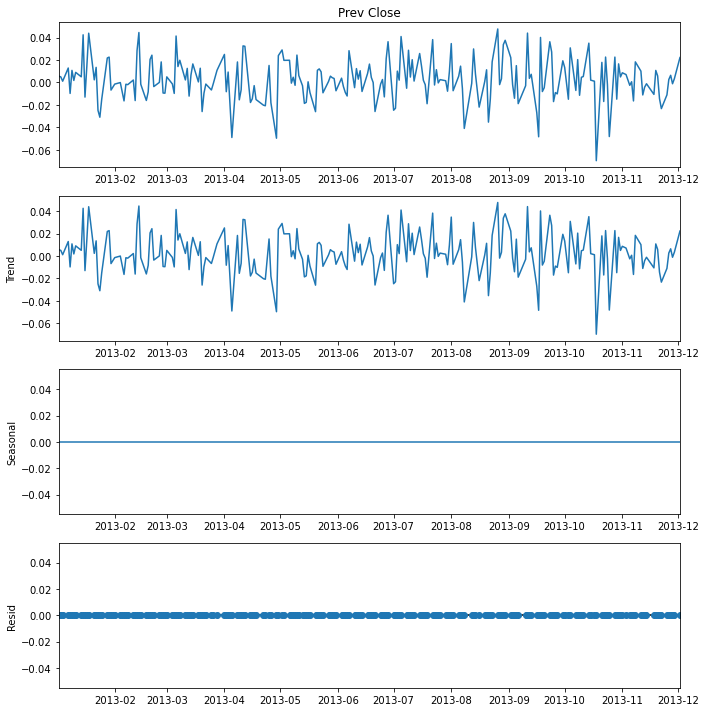

In [21]:
# also proving using decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

# we need to avoid the missing values

# multiplicative decomposition : Multiplicative seasonality is not appropriate for zero and negative values
# mul_decompos = seasonal_decompose(ts_log_diff.dropna(), model='multiplicative', freq=1)

# additive decomposition
add_decompos = seasonal_decompose(ts_log_diff.dropna(), model='additive', period = 1)


# plotting the decompositions
# additive decomposition plotting
plt.rcParams.update({'figure.figsize':(10,10)})
add_decompos.plot()
plt.show()

# multiplicative decomposition plotting
# mul_decompos.plot()
# plt.show()


In [23]:
HCLTechStockData.sort_index(inplace= True)

In [24]:
from statsmodels.tsa.stattools import acf, pacf
# acf tells the order of AR component; if we consider all the lags till the collinearity becomes zero, it will become a multi-collinearity problem
# pacf tells the order of MA component; pacf tell us "how many lags are actually impacting the time series, after removing the noise"; thus is helps in removing the multi-collinearity problem
# AR -- tells the number of lags that actually is sufficient to consider to predict the next value in the time series

lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20)

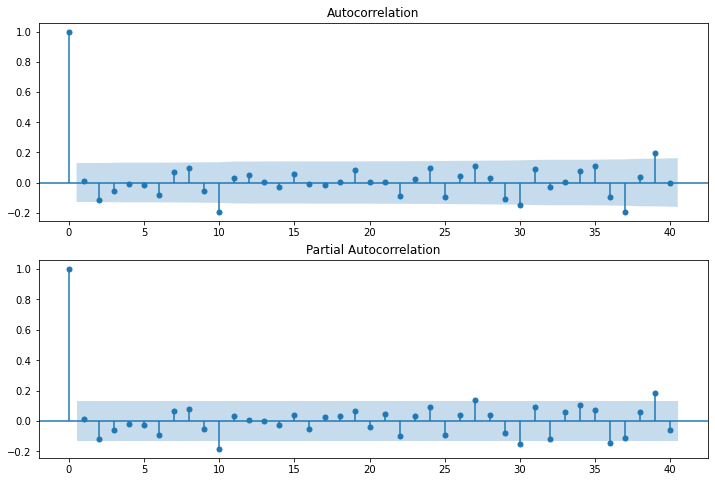

In [25]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts_log_diff.dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts_log_diff.dropna(),lags=40,ax=ax2)

In [26]:
# The spikes that we see in acf and pacf graph are called confidence interval
# we will find out order from this confidence interval
# the first spike to touch or cross the blue highlighted confidence interval would give the order
# from the above data the 0,1, 2(touches in pcf, as well as pacf), 
# thus we will start with the order (2,0,2); considering d to be 0

In [27]:
from statsmodels.tsa.arima_model import ARIMA

In [28]:
type(ts_log_diff)

pandas.core.series.Series

In [33]:
ts_log_diff.dropna(inplace=True)
#ts_log_diff = ts_log_diff[~ts_log_diff.isnull()]

W:\Softwares\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
W:\Softwares\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


p=0
d=0,
q=0
p=0
d=0,
q=1
p=0
d=0,
q=2


W:\Softwares\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
W:\Softwares\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


p=0
d=0,
q=3
p=0
d=1,
q=0
p=0
d=1,
q=1


W:\Softwares\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
W:\Softwares\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
W:\Softwares\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
W:\Softwares\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated freq

p=0
d=1,
q=2


W:\Softwares\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
W:\Softwares\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
W:\Softwares\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
W:\Softwares\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasti

p=0
d=1,
q=3
p=0
d=2,
q=0
p=0
d=2,
q=1
p=0
d=2,
q=2


W:\Softwares\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
W:\Softwares\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
W:\Softwares\Anaconda\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
W:\Softwares\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

p=0
d=2,
q=3
p=1
d=0,
q=0
p=1
d=0,
q=1


W:\Softwares\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


p=1
d=0,
q=2


W:\Softwares\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


p=1
d=0,
q=3
p=1
d=1,
q=0


W:\Softwares\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
W:\Softwares\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
W:\Softwares\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
W:\Softwares\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated freq

p=1
d=1,
q=1


W:\Softwares\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
W:\Softwares\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
W:\Softwares\Anaconda\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
W:\Softwares\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

p=1
d=1,
q=2


W:\Softwares\Anaconda\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
W:\Softwares\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
W:\Softwares\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
W:\Softwares\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

p=1
d=1,
q=3
p=1
d=2,
q=0
p=2
d=0,
q=0


W:\Softwares\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


p=2
d=0,
q=1


W:\Softwares\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


p=2
d=0,
q=2


W:\Softwares\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


p=2
d=0,
q=3
p=2
d=1,
q=0


W:\Softwares\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
W:\Softwares\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
W:\Softwares\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
W:\Softwares\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated freq

p=2
d=1,
q=1


W:\Softwares\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
W:\Softwares\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
W:\Softwares\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
W:\Softwares\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated freq

p=2
d=1,
q=3
p=2
d=2,
q=0


W:\Softwares\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
W:\Softwares\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


p=3
d=0,
q=0


W:\Softwares\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


p=3
d=0,
q=1


W:\Softwares\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


p=3
d=0,
q=2


W:\Softwares\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
W:\Softwares\Anaconda\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
W:\Softwares\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
W:\Softwares\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

p=3
d=0,
q=3
p=3
d=1,
q=0


W:\Softwares\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
W:\Softwares\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


p=3
d=1,
q=1


W:\Softwares\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
W:\Softwares\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
W:\Softwares\Anaconda\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
W:\Softwares\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

p=3
d=1,
q=2


W:\Softwares\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
W:\Softwares\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


p=3
d=2,
q=0


W:\Softwares\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
W:\Softwares\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
W:\Softwares\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
W:\Softwares\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated freq

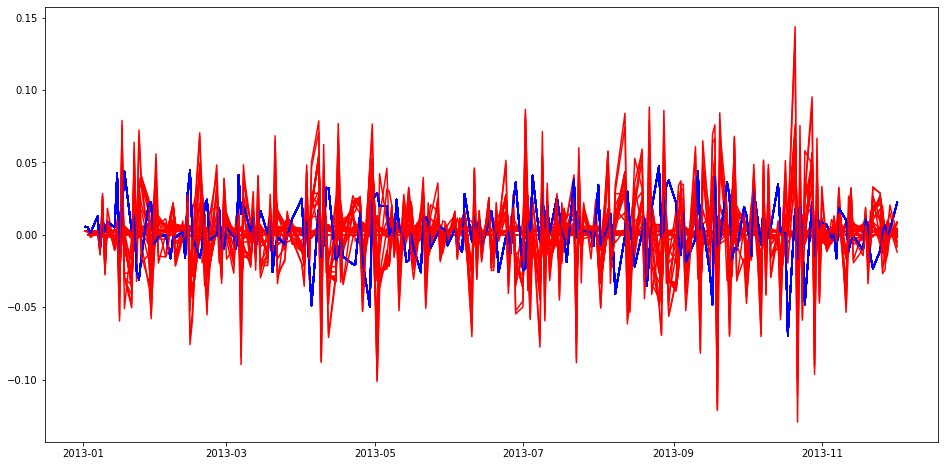

In [41]:
plt.figure(figsize=(16,8))
#ts_log_diff.dropna(inplace=True)
for p in range(4):
    for d in range(4):
        for q in range(4):
            try:
                model = ARIMA(ts_log_diff, order=(p,d,q))  
                results_ARIMA = model.fit()  
                plt.plot(ts_log_diff, color='blue')
                plt.plot(results_ARIMA.fittedvalues, color='red')
                print(f'p={p},\nd={d},\nq={q}')
                break
            except:
                continue
                
# values for which the data ARima model is working are
[0,0,0], [0,0,1], [0,0,2], [0,0,3], [0,1,0], [0,1,1], [0,1,2], [0,1,3], [0,2,0], [0,2,1], ...[ 2,0,2]

W:\Softwares\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


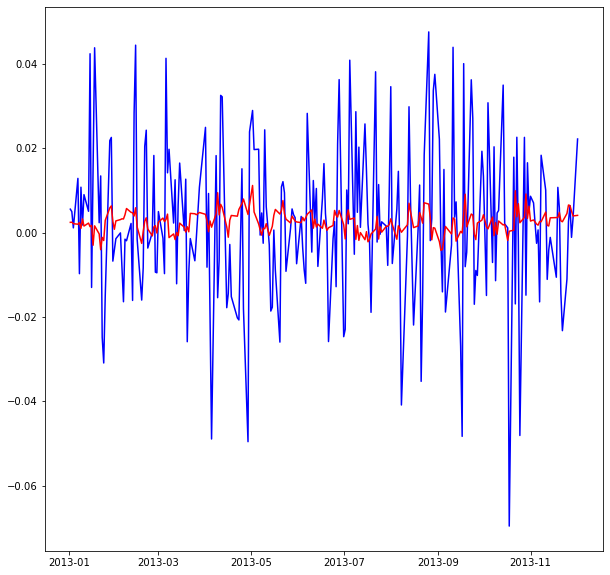

In [42]:
model = ARIMA(ts_log_diff, order=(2,0,2))  
results_ARIMA = model.fit()  
plt.plot(ts_log_diff, color='blue')
plt.plot(results_ARIMA.fittedvalues, color='red')
# print(f'p={p},\nd={d},\nq={q}')

# Taking results back to original scale

In [43]:
ARIMA_diff_predictions = pd.Series(results_ARIMA.fittedvalues, copy=True) # we first converted the fitted values to series
print(ARIMA_diff_predictions.head())

Date
2013-01-02    0.002432
2013-01-03    0.002471
2013-01-04    0.002117
2013-01-07    0.001981
2013-01-08    0.002377
dtype: float64


In [48]:
ARIMA_diff_predictions_cumsum = ARIMA_diff_predictions.cumsum() # then we took the cumulative sum
print(ARIMA_diff_predictions_cumsum.head())

Date
2013-01-02    0.002432
2013-01-03    0.004903
2013-01-04    0.007021
2013-01-07    0.009002
2013-01-08    0.011379
dtype: float64


In [56]:
# logic behind cum sum
# 1,2,3,4,5,6

# earlier shift() subtraction
# 1 - na = na
# 2 - 1 = 1
# 3 - 2 = 1
# 4 - 3 = 1
# 5 - 4 = 1
# 6 - 5 = 1

# after cumsum:
# na(say) + 1 = 1
# 1 + 1 = 2
# 2 + 1 = 3
# 3 + 1 = 4
# 4 + 1 = 5
# 5 + 1 = 6


In [51]:
ts_log.iloc[0] # the first value

6.427620502536943

In [52]:
ARIMA_log_prediction = pd.Series(ts_log.iloc[0], index=ts_log.index) # a series of first value

In [53]:
ARIMA_log_prediction

Date
2013-01-01    6.427621
2013-01-02    6.427621
2013-01-03    6.427621
2013-01-04    6.427621
2013-01-07    6.427621
                ...   
2013-11-26    6.427621
2013-11-27    6.427621
2013-11-28    6.427621
2013-11-29    6.427621
2013-12-02    6.427621
Length: 230, dtype: float64

In [55]:
ARIMA_log_prediction = pd.Series(ts_log.iloc[0], index=ts_log.index) # because the first element was removed; so it was added to all values
ARIMA_log_prediction = ARIMA_log_prediction.add(ARIMA_diff_predictions_cumsum,fill_value=0) #element wise addition; fill_value = 0 -- fill missing values with 0
ARIMA_log_prediction.head()

Date
2013-01-01    6.427621
2013-01-02    6.430053
2013-01-03    6.432524
2013-01-04    6.434641
2013-01-07    6.436622
dtype: float64

Text(0.5, 1.0, 'RMSE: 76.7107')

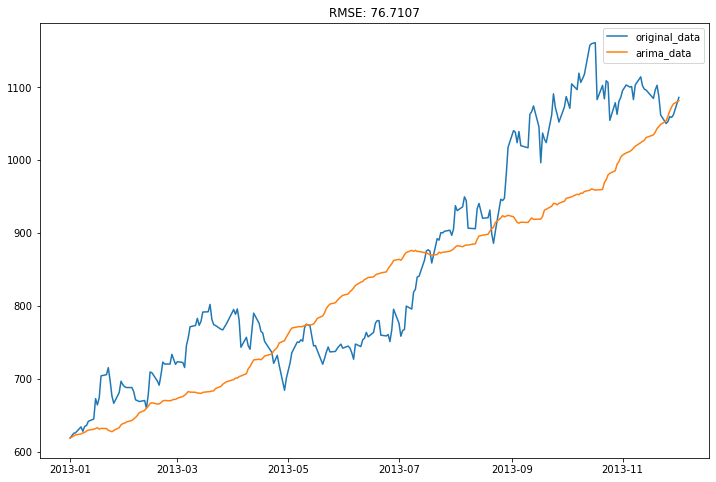

In [57]:
plt.figure(figsize=(12,8))
predictions_ARIMA = np.exp(ARIMA_log_prediction) # reverse of log
plt.plot(HCLTechStockData, label="original_data")
plt.plot(predictions_ARIMA, label="arima_data")
plt.legend(loc='best')
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA - HCLTechStockData)**2)/len(HCLTechStockData)))

In [58]:
results_ARIMA.predict(10,20)

Date
2013-01-16    0.001704
2013-01-17   -0.002997
2013-01-18    0.001599
2013-01-21   -0.000306
2013-01-22   -0.004052
2013-01-23   -0.001140
2013-01-24   -0.001885
2013-01-25    0.002912
2013-01-28    0.005861
2013-01-29    0.006331
2013-01-30    0.002643
dtype: float64

In [37]:
import pmdarima as pm
def arimamodel(timeseries):
    automodel = pm.auto_arima(timeseries, 
                              start_p=3, 
                              start_q=3,
                              max_p=5,
                              max_q=5,
                              test="adf",
                              seasonal=True,
                              trace=True)
    return automodel

ModuleNotFoundError: No module named 'pmdarima'

In [53]:
arimamodel(ts_log)

Performing stepwise search to minimize aic
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-1158.020, Time=0.38 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1167.424, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1165.456, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1165.465, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1165.525, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1163.485, Time=0.09 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.629 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True)